# Neural Network Text Classification

This text classification predicts binary value, i.e., positive or negative from texts in the review.

# Package

In [13]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np


# Data

num_words allows you to have most frequent XXX words in the data, so rare words are discarded.

In [2]:
imdb = tf.keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

# EDA

In [3]:
print("Number of training data: {}, and labels: {}".format(len(train_data), len(train_labels)))

Number of training data: 25000, and labels: 25000


Each word is stored as integers, and each integer represents a word which is stored in a dictionary.

In [4]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Each element is one review.

In [5]:
print(len(train_data[1]), len(train_data[2]))

189 141


In [25]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

# Convert integer to text

In [6]:
# dictionary of integer and words
word_index = imdb.get_word_index()

# first indices are reserved?
word_index = {k:(v+3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [7]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

Before making model, the review needs to be the same length, use the following to standardize the length.

In [15]:
train_data = pad_sequences(train_data,
                           value = word_index["<PAD>"],
                           padding = 'post',
                           maxlen = 256)

test_data = pad_sequences(test_data,
                          value = word_index["<PAD>"],
                          padding = 'post',
                          maxlen = 256)

In [16]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [17]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

# Model

vocab_size is used in input shape argument. It was set when we loaded data by num_words argument.
<br>
Embedding layer: integer to dictionary lookup
<br>
GlobalAveragePooling1D: make simple way of handling input variable length.
<br>
16 hidden units
<br>
sigmoid: 0 to 1 confidence level.

In [18]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16)) # 16 is the argument of output_dim
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation = tf.nn.relu))
model.add(keras.layers.Dense(1, activation = tf.nn.sigmoid))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

# Validation

In [20]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

# Model training

The following means, using 512 samples in each iteration, train model, and we have 40 iterations (epoch). In each training, use 10,000 sample to measure accuracy.

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 40,
                    batch_size = 512,
                    validation_data = (x_val, y_val),
                    verbose = 1)

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
15000/15000 [==============================] - 1s 90us/sample - loss: 0.6917 - acc: 0.6177 - val_loss: 0.6895 - val_acc: 0.6710
Epoch 2/40
15000/15000 [==============================] - 1s 44us/sample - loss: 0.6856 - acc: 0.7223 - val_loss: 0.6814 - val_acc: 0.7461
Epoch 3/40
15000/15000 [==============================] - 1s 44us/sample - loss: 0.6732 - acc: 0.7611 - val_loss: 0.6658 - val_acc: 0.7537
Epoch 4/40
15000/15000 [==============================] - 1s 46us/sample - loss: 0.6512 - acc: 0.7678 - val_loss: 0.6404 - val_acc: 0.7561
Epoch 5/40
15000/15000 [==============================] - 1s 44us/sample - loss: 0.6183 - acc: 0.7922 - val_loss: 0.6057 - val_acc: 0.7848
Epoch 6/40
15000/15000 [==============================] - 1s 45us/sample - loss: 0.5760 - acc: 0.8136 - val_loss: 0.5647 - val_acc: 0.8045
Epoch 7/40
15000/15000 [==============================] - 1s 44us/sa

# Evaluation

In [23]:
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 1s 24us/sample - loss: 0.3366 - acc: 0.8705
[0.33660174537658694, 0.87048]


It means that, from acc of test_data, we got accuracy of 87%, and, from acc of training model, we wanted the test accuracy tp get closer to 97%.

# Accuracy and loss over time

loss and acc are of training data.

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

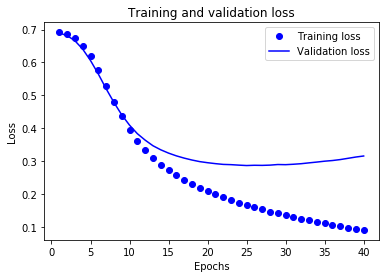

In [34]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# bo = blue dot
plt.plot(epochs, loss, 'bo', label = 'Training loss')
# b = solid blue line
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

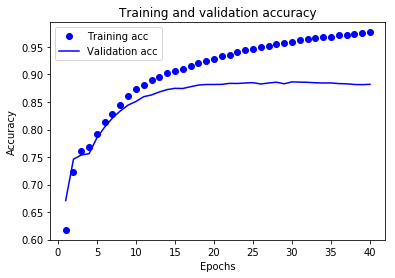

In [36]:
plt.clf() # CLear Figure

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

After around 30 epochs, we observe the validation acc is decreasing, meaning overfitting.